In [1]:
import mne
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
import random

from IPython.display import clear_output
import time
#import  as catch22

# Demonstration of Importatnt Methods

### Reading File

In [2]:
example_eeg = mne.io.read_raw_edf('eeg1.edf')

print("------------------------------------------------")
print('Type:', type(example_eeg))
print("------------------------------------------------")
example_eeg

Extracting EDF parameters from C:\Users\victo\jupyter_files\BIM 280\Final_Project\eeg1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
------------------------------------------------
Type: <class 'mne.io.edf.edf.RawEDF'>
------------------------------------------------


<RawEDF | eeg1.edf, 21 x 1790208 (6993.0 s), ~21 kB, data not loaded>

### Accessing and Visualizing Voltage Data

In [3]:
# numpy.array where ['channel index', 'voltage at time t']
example_data = example_eeg.get_data()
# dimensions: (total_channel_count) X (total_session_duration_in_seconds * 256) ------- (multiplied by 256 because data was sampled at 256 Hz)
print(example_data.shape)
example_time = len(example_data[0]) / 256
print('Session Duration:', example_time, 's =', int(example_time/3600), ':', int(example_time/60%60), ':', int(example_time%60), '(H:MM:SS)')

(21, 1790208)
Session Duration: 6993.0 s = 1 : 56 : 33 (H:MM:SS)


Using matplotlib as 2D backend.


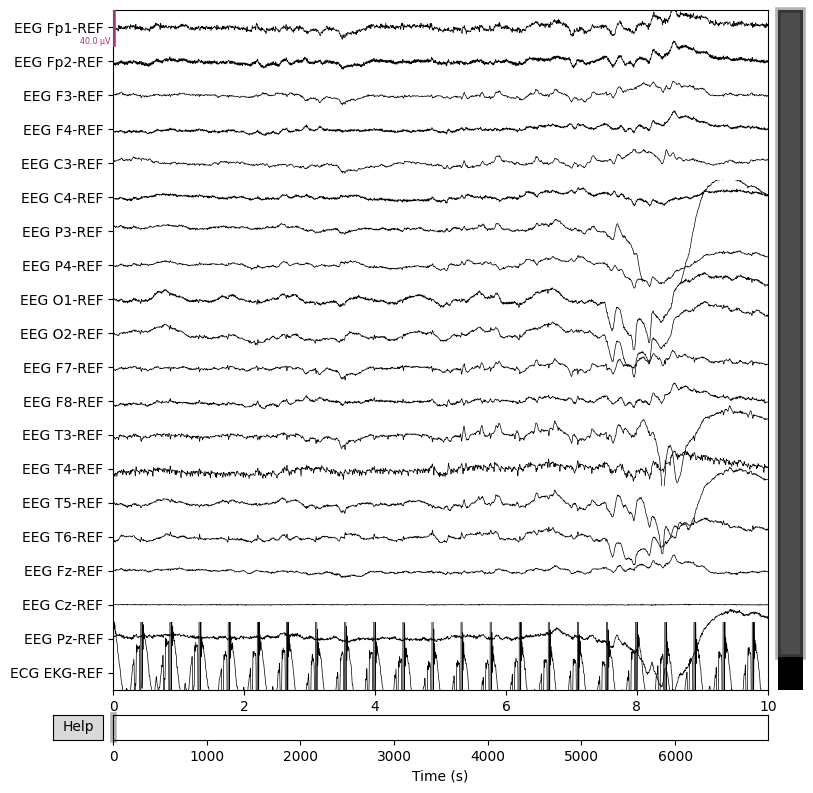

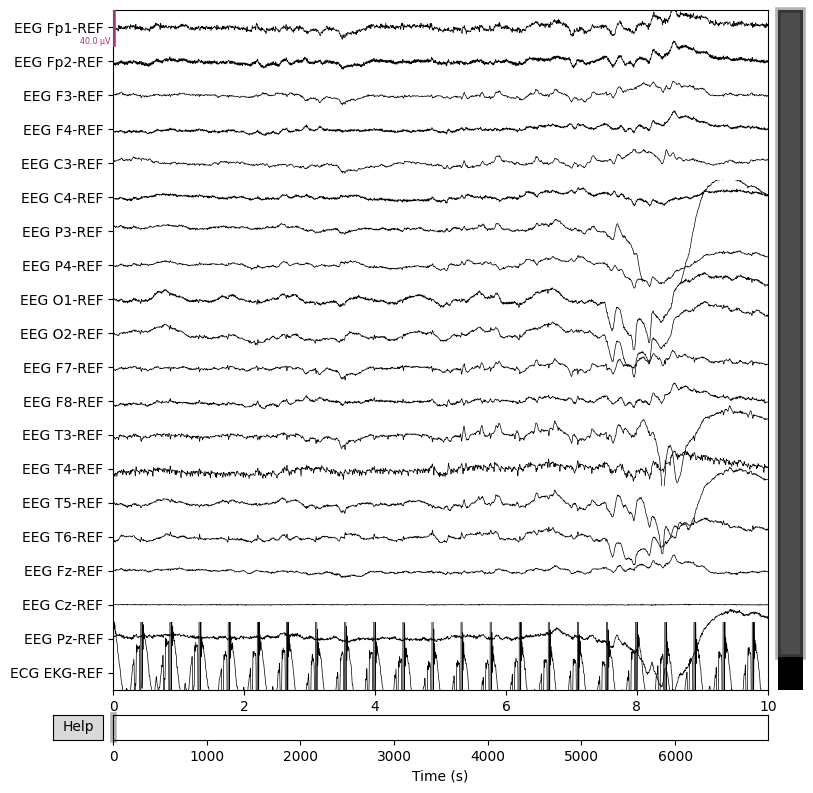

In [4]:
# plotting raw voltage data
example_eeg.plot(start=0,     # plot start time in seconds
                 duration=10, # plot duration in seconds
                )

### Computing and Visualizing Power Spectrum Density

In [5]:
example_psd = example_eeg.compute_psd(fmin=8,   # lower frequency (Hz)
                                      fmax=13,  # upper frequency (Hz)
                                      tmin=106, # start time (seconds)
                                      tmax=107, # stop time (seconds)
                                     )
# numpy.array where ['channel index', 'power/frequency at time f']
example_psd_data = example_psd.get_data()
# dimensions: (total_channel_count) X (upper_frequency - lower_frequency)
print(example_psd_data.shape)
print('Selected Frequencies:', example_psd.freqs)

np.set_printoptions(linewidth=110)
example_psd_data

Effective window size : 1.004 (s)
(21, 5)
Selected Frequencies: [ 8.96498054  9.96108949 10.95719844 11.95330739 12.94941634]


array([[4.00800057e-13, 1.20338368e-13, 2.35207429e-13, 1.55441488e-13, 2.98992775e-14],
       [2.09085950e-13, 1.42112344e-13, 1.53855130e-13, 9.65425041e-14, 5.83850802e-14],
       [2.98713465e-13, 8.96754456e-14, 1.78861040e-13, 1.11375358e-13, 3.67548354e-14],
       [5.79713095e-13, 3.46443342e-13, 9.96336027e-14, 1.03810930e-13, 1.58984858e-13],
       [1.62098876e-13, 1.40753798e-13, 2.41458529e-13, 9.45641578e-14, 5.57861363e-15],
       [1.01546892e-12, 5.28052007e-13, 7.59137552e-13, 5.44385563e-13, 2.87569478e-13],
       [4.82359761e-13, 7.34601714e-14, 1.91101305e-13, 6.87475156e-14, 2.52384475e-14],
       [5.57081302e-13, 2.34687632e-13, 3.40996597e-13, 2.16573806e-13, 1.33596388e-13],
       [4.47488956e-13, 2.05088236e-13, 3.45092719e-13, 1.23118237e-13, 1.16674022e-13],
       [4.66925704e-13, 1.53229208e-13, 3.08383057e-13, 1.61759167e-13, 1.54819892e-13],
       [2.91652531e-13, 9.03587113e-14, 1.95983102e-13, 1.34747945e-13, 5.58823146e-14],
       [5.14813409e-1

C:\Users\victo\AppData\Local\Temp\ipykernel_25624\4179510587.py:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  example_psd.plot()
C:\Users\victo\anaconda3\envs\bim280\Lib\site-packages\mne\viz\utils.py:165: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


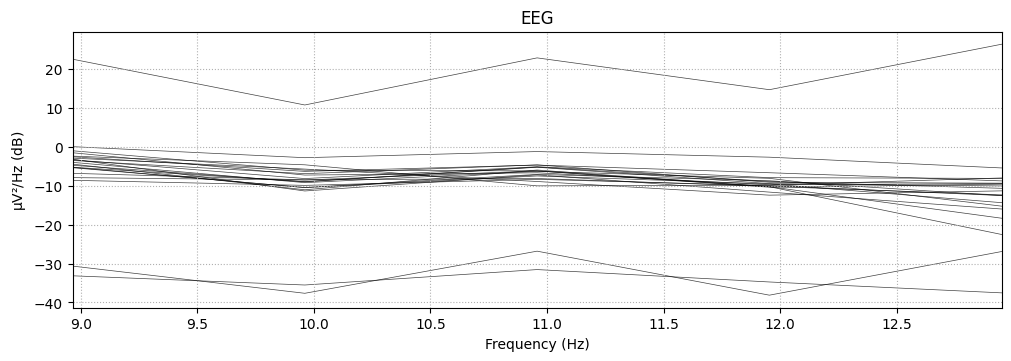

In [6]:
# PSD Plot
example_psd.plot()

### Performing ICA

In [7]:
example_eeg_raw = mne.io.read_raw_edf('eeg1.edf', preload=True).drop_channels(['ECG EKG-REF', 'Resp Effort-REF']).copy()

num_of_channels = len(example_eeg_raw.ch_names)
# set up and fit the ICA
ica = mne.preprocessing.ICA(n_components=num_of_channels,
                            random_state=97,
                            max_iter=800
                           )
ica.fit(example_eeg_raw)

example_eeg_clean = ica.apply(example_eeg_raw.copy())
example_eeg_clean

Extracting EDF parameters from C:\Users\victo\jupyter_files\BIM 280\Final_Project\eeg1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1790207  =      0.000 ...  6992.996 secs...
Fitting ICA to data using 19 channels (please be patient, this may take a while)


C:\Users\victo\AppData\Local\Temp\ipykernel_31392\3969082107.py:9: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(example_eeg_raw)


Selecting by number: 19 components
Fitting ICA took 65.3s.
Applying ICA to Raw instance
    Transforming to ICA space (19 components)
    Zeroing out 0 ICA components
    Projecting back using 19 PCA components


<RawEDF | eeg1.edf, 19 x 1790208 (6993.0 s), ~259.5 MB, data loaded>

# Start of Project

## Reading/Processing Annotations and Selecting EEGs 

In [8]:
# Unannotated EEGs (These are file indices, NOT python indices)
no_annot_EEGs = [ '3', '10', '18', '27', '28', '29', '30', '32',
                 '35', '37', '42', '45', '48', '49', '53', '55',
                 '57', '58', '59', '60', '61', '70', '72']

# Annotation Data from Experts A, B, and C
# Each one is stored in a pandas DataFrame, where:
# -- column numbers correspond to EEG number
# --    row numbers correspond to start time (in seconds, first row starts at 0s)
# --  cell contents correspond to segment label (1 = ictal, 0 = non-ictal)
annot_A = pd.read_csv('annotations_2017_A.csv')
annot_B = pd.read_csv('annotations_2017_B.csv')
annot_C = pd.read_csv('annotations_2017_C.csv')

# Removing EEGs
annot_A = annot_A.drop(labels=no_annot_EEGs, axis=1)
annot_B = annot_B.drop(labels=no_annot_EEGs, axis=1)
annot_C = annot_C.drop(labels=no_annot_EEGs, axis=1)

# EEGs annotated by two experts (we don't have a method for resolving disagreements of two experts)
two_annots = ['8', '23', '33', '54', '64', '68', '74']

annot_A = annot_A.drop(labels=two_annots, axis=1)
annot_B = annot_B.drop(labels=two_annots, axis=1)
annot_C = annot_C.drop(labels=two_annots, axis=1)



# !!! IMPORTANT VARIABLE: INDICES OF ALL 49 USED EEGS !!!
annot_eeg_indices = list(annot_A.columns)



# EEGs only annotated by Expert A:  2
# EEGs only annotated by Expert B: 24
# EEGs only annotated by Expert C:  6, 12, 26, 43, 46, 56, 65

annot_A = annot_A.drop(labels=['6', '24', '26', '43', '46', '56', '65'], axis=1)
annot_B = annot_B.drop(labels=['6',  '2', '26', '43', '46', '56', '65'], axis=1)
annot_C = annot_C.drop(labels=['2', '24'], axis=1)

## Combining Annotations

In [9]:
# values in combined_annot will be treated as the TRUE labels for classifier
# for most EEGs (specifically where all experts annotated), we labeled segments as:
# -- 1 (ictal) if 2 or 3 experts labeled 1
# -- 0 (non-ictal) otherwise 
# if an EEG only had one annotator, we treated their labels as TRUE
combined_annot = []

for i in annot_eeg_indices:
    
    # EEGs Annotated by ALL Experts
    if (i != '2' and i != '6' and i != '12' and i !='24' and i !='26' and i !='43' and i !='46' and i !='56' and i !='65'):
        annot_col_mean = np.mean(np.array([annot_A[i], annot_B[i], annot_C[i]]),0)
        annot_col_mean = annot_col_mean[~np.isnan(annot_col_mean)]

        # annot_col_mean elements contain 0, 0.3333, 0.6666, or 1
        # annot_col_mean + 1/3 makes elements 0.3333, 0.6666, 1, or 1.3333
        # converting to type int rounds down to nearest integer leaving zeros and ones
        new_annot_col = (annot_col_mean + 1/3).astype(int)
        
        combined_annot.append(new_annot_col)
    
    # EEGs Annotated only by Expert A
    elif(i == '2'):
        annot_col = np.array(annot_A[i])
        new_annot_col = annot_col[:3760]
        # because half of raw data for EEG 2 is missing
        
        combined_annot.append(new_annot_col)

    # EEGs Annotated only by Expert B
    elif(i == '24'):
        annot_col = np.array(annot_B[i])
        new_annot_col = annot_col[~np.isnan(annot_col)]
        
        combined_annot.append(new_annot_col)
    
    # EEGs Annotated only by Expert C
    else:
        annot_col = np.array(annot_C[i])
        new_annot_col = annot_col[~np.isnan(annot_col)]
        
        combined_annot.append(new_annot_col)

# combined_annot should now contain 49 list elements, each of different lengths (because each EEG had different session lengths)

## Loading EDFs and ICA Preprocessing
### Can take more than 1 hour to execute.
### Run only if you would like to check output or 'processed_eeg#.edf' files have not been created yet.

In [10]:
n_eeg_files = 79  # Total number of EEG files
n_components = 19
random_state = 97
max_iter = 800
file_prefix = "eeg"
file_suffix = ".edf"

clean_dict = {}
montage = mne.channels.make_standard_montage('standard_1020', 0.0557)

# timer start
tic = time.perf_counter()

for i in annot_eeg_indices:
    file_name = file_prefix + i + file_suffix
    try:
        # Loading Data
        raw = mne.io.read_raw_edf(file_name, preload=True).copy()

        # Drop unneccessary channels
        try:
            raw.drop_channels(['ECG EKG-REF', 'Resp Effort-REF'])
        except:
            print(" ")
        try:
            raw.drop_channels(['ECG EKG', 'Resp Effort'])
        except:
            print(" ")

        # Create list of channel names to estimate physical channel positions in headset
        channel_names = raw.info.ch_names.copy()
        for j in range(len(channel_names)):
            channel_names[j] = channel_names[j][4:-4]
        k = 0
        for name in channel_names:
            raw.info['chs'][k]['loc'] = np.append(montage.get_positions()['ch_pos'][name], np.zeros(9))
            k = k + 1

        raw = raw.filter(l_freq=0, h_freq=30)
        
        # Initialize and fit the ICA
        ica = mne.preprocessing.ICA(n_components=n_components,
                                    random_state=random_state,
                                    max_iter=max_iter
                                   )
        ica.fit(raw)
        # Apply ICA to clean the raw data
        raw_clean = ica.apply(raw.copy())

        clean_dict[file_prefix + i] = raw_clean

        # check time
        toc = int(time.perf_counter()-tic)
        clear_output(wait=True)
        print(int(toc/60), toc%60)
        print(f"Processed and cleaned {file_name} successfully.")
    except Exception as e:
        print(f"Error processing {file_name}: {e}")

64 42
Processed and cleaned eeg79.edf successfully.


### Storing EDFs after ICA preprocessing
#### (To quickly access them after exiting python session)

In [11]:
tic = time.perf_counter()
for i in annot_eeg_indices:
    eeg_name = 'eeg' + i
    file_name = 'processed_' + eeg_name + '.edf'
    mne.export.export_raw(file_name, clean_dict[eeg_name])

    clear_output(wait=True)
    toc = int(time.perf_counter() - tic)
    print('EEG'+i+' Stored.')
    print('Time Elapsed:', int(toc/60), ':', toc%60)

EEG79 Stored.
Time Elapsed: 36 : 37


### Retrieving Post-ICA EDFs 

In [12]:
processed_dict = {}
for i in annot_eeg_indices:
    processed_dict['eeg' + i] = mne.io.read_raw_edf("processed_eeg" + i + ".edf")

Extracting EDF parameters from C:\Users\victo\jupyter_files\BIM 280\Final_Project\processed_eeg1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\Users\victo\jupyter_files\BIM 280\Final_Project\processed_eeg2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\Users\victo\jupyter_files\BIM 280\Final_Project\processed_eeg4.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\Users\victo\jupyter_files\BIM 280\Final_Project\processed_eeg5.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\Users\victo\jupyter_files\BIM 280\Final_Project\processed_eeg6.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\Users\victo\jupyter_files\BIM 2

# Extract times of seizures and non-seizures

In [13]:
ictal_times = []
non_ictal_times = []

for i in range(len(combined_annot)):
    ictal_times.append(np.where(combined_annot[i] == 1)[0])
    non_ictal_times.append(np.where(combined_annot[i] == 0)[0])

In [14]:
random.seed(1)
samp_count = 31
ictal_times_sample = np.array([])
non_ictal_times_sample = np.array([])


for i in range(len(ictal_times)):
    if i != 0:
        ictal_times_i = list(ictal_times[i])

        # randomly selects subset of indices that correspond to ictal data in EEG i
        rand_ictal_samp = random.sample(ictal_times_i, samp_count)
        rand_ictal_samp = np.array(rand_ictal_samp)
        rand_ictal_samp = rand_ictal_samp.reshape(1, samp_count)

        # append random selection from EEG i onto full matrix of selected times
        ictal_times_sample = np.concatenate((ictal_times_sample, rand_ictal_samp), axis=0)

        
        non_ictal_times_i = list(non_ictal_times[i])
        
        # randomly selects subset of indices that correspond to non-ictal data in EEG i
        rand_non_ictal_samp = random.sample(non_ictal_times_i, samp_count)
        rand_non_ictal_samp = np.array(rand_non_ictal_samp)
        rand_non_ictal_samp = rand_non_ictal_samp.reshape(1, samp_count)

        # append random selection from EEG i onto full matrix of selected times
        non_ictal_times_sample = np.concatenate((non_ictal_times_sample, rand_non_ictal_samp), axis=0)
    else:
        ictal_times_i = list(ictal_times[i])

        # randomly selects subset of indices that correspond to ictal data in EEG i
        rand_ictal_samp = random.sample(ictal_times_i, samp_count)
        rand_ictal_samp = np.array(rand_ictal_samp)
        
        ictal_times_sample = np.append(ictal_times_sample, rand_ictal_samp)
        ictal_times_sample = ictal_times_sample.reshape(1, samp_count)

        non_ictal_times_i = list(non_ictal_times[i])
        
        # randomly selects subset of indices that correspond to non-ictal data in EEG i
        rand_non_ictal_samp = random.sample(non_ictal_times_i, samp_count)
        rand_non_ictal_samp = np.array(rand_non_ictal_samp)
        
        non_ictal_times_sample = np.append(non_ictal_times_sample, rand_non_ictal_samp)
        non_ictal_times_sample = non_ictal_times_sample.reshape(1, samp_count)

ictal_times_sample = ictal_times_sample.astype(int)
non_ictal_times_sample = non_ictal_times_sample.astype(int)

In [15]:
ictal_times_sample

array([[1598, 6117,  419, ...,  342, 6282, 5577],
       [2074, 2061, 1965, ..., 1959, 1929, 2070],
       [1774, 1033, 1420, ..., 1452, 1382, 1029],
       ...,
       [ 690,  496,  729, ...,  874,  880,  678],
       [4837, 2452, 1850, ..., 4299, 1280, 1852],
       [1100,  575,  612, ..., 1102,  170,  159]])

# Power Spectrum Density Analysis

In [16]:
def area_under_psd(pwr_per_freq):
    freq_count = len(pwr_per_freq)
    power = 0
    for i in range(freq_count-1):
        # calculate area of trapizoid between frequency i and frequency i+1
        # step size between freqencies is 1 Hz
        power = power + (pwr_per_freq[i] + pwr_per_freq[i+1]) / 2
    
    return power

def power_in_range(band_name, eeg_data, sampled_times, eeg_indices, tic):
    lower_freq = band_bounds[band_name][0]
    upper_freq = band_bounds[band_name][1]
    
    freqs = eeg_data['eeg1'].compute_psd(fmin=lower_freq, fmax=upper_freq).freqs
    df = freqs[1] - freqs[0]
    
    pwr_in_range = np.array([])
    sample_eeg_index = 0

    for i in eeg_indices:
        pwr_per_time = np.array([])
        
        for j in list(sampled_times[sample_eeg_index]):
            clear_output(wait=True)
            print("Frequency Band:", band_name)
            print("EEG:", i, "  ", sample_eeg_index+1, "/ 49")
            print("Time in EEG:", j)
            toc = int(time.perf_counter() - tic)
            print('Elapsed Time:', int(toc/3600), ':', int(toc / 60) % 60, ':', toc%60)
            temp_psd = eeg_data['eeg'+i].compute_psd(fmin=lower_freq,
                                                     fmax=upper_freq,
                                                     tmin=j,
                                                     tmax=j+1
                                                    ).get_data()
            pwr_per_chan = np.array([])
            for k in range(len(temp_psd)):
                pwr_per_chan = np.append(pwr_per_chan,
                                         area_under_psd(temp_psd[k])
                                        )
            pwr_at_time_j = np.mean(pwr_per_chan)
            
            pwr_per_time = np.append(pwr_per_time, pwr_at_time_j)
            
        pwr_in_range = np.append(pwr_in_range, pwr_per_time)
        sample_eeg_index = sample_eeg_index + 1

    return pwr_in_range

In [17]:
band_list = ['delta', 'theta', 'alpha', 'beta']
band_bounds = {
    'delta': [0.1,  4],
    'theta':   [4,  8],
    'alpha':   [8, 13],
    'beta':   [13, 30]
}
pwr_in_band_ict = {}
pwr_in_band_non_ict = {}

start_tic = time.perf_counter()
for band in band_list:
    pwr_in_band_ict[band] = power_in_range(band_name = band,
                                           eeg_data = clean_dict,
                                           sampled_times = ictal_times_sample,
                                           eeg_indices = annot_eeg_indices,
                                           tic = start_tic
                                          )
    pwr_in_band_non_ict[band] = power_in_range(band_name = band,
                                               eeg_data = clean_dict,
                                               sampled_times = non_ictal_times_sample,
                                               eeg_indices = annot_eeg_indices,
                                               tic = start_tic
                                              )

Frequency Band: beta
EEG: 79    49 / 49
Time in EEG: 1967
Elapsed Time: 0 : 7 : 4
Effective window size : 1.004 (s)


In [17]:
lower_freq, upper_freq = 0.1, 4
pwr_in_delta_ict = np.array([])
sample_eeg_index = 0

for i in annot_eeg_indices:
    pwr_per_time = np.array([])
    
    for j in list(ictal_times_sample[sample_eeg_index]):
        clear_output(wait=True)
        print("EEG: ", i)
        print("Time: ", j)
        test_psd =  eeg_dict['eeg'+i].compute_psd(fmin=lower_freq,
                                                  fmax=upper_freq,
                                                  tmin=j,
                                                  tmax=j+1
                                                 ).get_data()
        pwr_per_chan = np.array([])
        for k in range(len(test_psd)):
            pwr_per_chan = np.append(pwr_per_chan,
                                     power_in_freq_range(test_psd[k])
                                    )
        
        pwr_per_time = np.append(pwr_per_time,
                                 np.mean(pwr_per_chan)
                                )
        
    pwr_in_delta_ict = np.append(pwr_in_delta_ict, pwr_per_time)
    sample_eeg_index = sample_eeg_index + 1

pwr_in_delta_non_ict = np.array([])
sample_eeg_index = 0

for i in annot_eeg_indices:
    pwr_per_time = np.array([])
        
    for j in list(non_ictal_times_sample[sample_eeg_index]):
        clear_output(wait=True)
        print("EEG: ", i)
        print("Time: ", j)
        test_psd =  eeg_dict['eeg'+i].compute_psd(fmin=lower_freq,
                                                  fmax=upper_freq,
                                                  tmin=j,
                                                  tmax=j+1
                                                 ).get_data()
        pwr_per_chan = np.array([])
        for k in range(len(test_psd)):
            pwr_per_chan = np.append(pwr_per_chan,
                                     power_in_freq_range(test_psd[k])
                                    )
        
        pwr_per_time = np.append(pwr_per_time,
                                 np.mean(pwr_per_chan)
                                )
        
    pwr_in_delta_non_ict = np.append(pwr_in_delta_non_ict, pwr_per_time)
    sample_eeg_index = sample_eeg_index + 1

EEG:  79
Time:  1967
Effective window size : 1.004 (s)


In [18]:
lower_freq, upper_freq = 4, 8
pwr_in_theta_ict = np.array([])
sample_eeg_index = 0

for i in annot_eeg_indices:
    pwr_per_time = np.array([])
    
    for j in list(ictal_times_sample[sample_eeg_index]):
        clear_output(wait=True)
        print("EEG: ", i)
        print("Time: ", j)
        test_psd =  eeg_dict['eeg'+i].compute_psd(fmin=lower_freq,
                                                  fmax=upper_freq,
                                                  tmin=j,
                                                  tmax=j+1
                                                 ).get_data()
        pwr_per_chan = np.array([])
        for k in range(len(test_psd)):
            pwr_per_chan = np.append(pwr_per_chan,
                                     power_in_freq_range(test_psd[k])
                                    )
        
        pwr_per_time = np.append(pwr_per_time,
                                 np.mean(pwr_per_chan)
                                )
        
    pwr_in_theta_ict = np.append(pwr_in_theta_ict, pwr_per_time)
    sample_eeg_index = sample_eeg_index + 1

pwr_in_theta_non_ict = np.array([])
sample_eeg_index = 0

for i in annot_eeg_indices:
    pwr_per_time = np.array([])
        
    for j in list(non_ictal_times_sample[sample_eeg_index]):
        clear_output(wait=True)
        print("EEG: ", i)
        print("Time: ", j)
        test_psd =  eeg_dict['eeg'+i].compute_psd(fmin=lower_freq,
                                                  fmax=upper_freq,
                                                  tmin=j,
                                                  tmax=j+1
                                                 ).get_data()
        pwr_per_chan = np.array([])
        for k in range(len(test_psd)):
            pwr_per_chan = np.append(pwr_per_chan,
                                     power_in_freq_range(test_psd[k])
                                    )
        
        pwr_per_time = np.append(pwr_per_time,
                                 np.mean(pwr_per_chan)
                                )
        
    pwr_in_theta_non_ict = np.append(pwr_in_theta_non_ict, pwr_per_time)
    sample_eeg_index = sample_eeg_index + 1

EEG:  79
Time:  1967
Effective window size : 1.004 (s)


In [19]:
lower_freq, upper_freq = 8, 13
pwr_in_alpha_ict = np.array([])
sample_eeg_index = 0

for i in annot_eeg_indices:
    pwr_per_time = np.array([])
    
    for j in list(ictal_times_sample[sample_eeg_index]):
        clear_output(wait=True)
        print("EEG: ", i)
        print("Time: ", j)
        test_psd =  eeg_dict['eeg'+i].compute_psd(fmin=lower_freq,
                                                  fmax=upper_freq,
                                                  tmin=j,
                                                  tmax=j+1
                                                 ).get_data()
        pwr_per_chan = np.array([])
        for k in range(len(test_psd)):
            pwr_per_chan = np.append(pwr_per_chan,
                                     power_in_freq_range(test_psd[k])
                                    )
        
        pwr_per_time = np.append(pwr_per_time,
                                 np.mean(pwr_per_chan)
                                )
        
    pwr_in_alpha_ict = np.append(pwr_in_alpha_ict, pwr_per_time)
    sample_eeg_index = sample_eeg_index + 1

pwr_in_alpha_non_ict = np.array([])
sample_eeg_index = 0

for i in annot_eeg_indices:
    pwr_per_time = np.array([])
        
    for j in list(non_ictal_times_sample[sample_eeg_index]):
        clear_output(wait=True)
        print("EEG: ", i)
        print("Time: ", j)
        test_psd =  eeg_dict['eeg'+i].compute_psd(fmin=lower_freq,
                                                  fmax=upper_freq,
                                                  tmin=j,
                                                  tmax=j+1
                                                 ).get_data()
        pwr_per_chan = np.array([])
        for k in range(len(test_psd)):
            pwr_per_chan = np.append(pwr_per_chan,
                                     power_in_freq_range(test_psd[k])
                                    )
        
        pwr_per_time = np.append(pwr_per_time,
                                 np.mean(pwr_per_chan)
                                )
        
    pwr_in_alpha_non_ict = np.append(pwr_in_alpha_non_ict, pwr_per_time)
    sample_eeg_index = sample_eeg_index + 1

EEG:  79
Time:  1967
Effective window size : 1.004 (s)


In [20]:
lower_freq, upper_freq = 13, 30
pwr_in_beta_ict = np.array([])
sample_eeg_index = 0

for i in annot_eeg_indices:
    pwr_per_time = np.array([])
    
    for j in list(ictal_times_sample[sample_eeg_index]):
        clear_output(wait=True)
        print("EEG: ", i)
        print("Time: ", j)
        test_psd =  eeg_dict['eeg'+i].compute_psd(fmin=lower_freq,
                                                  fmax=upper_freq,
                                                  tmin=j,
                                                  tmax=j+1
                                                 ).get_data()
        pwr_per_chan = np.array([])
        for k in range(len(test_psd)):
            pwr_per_chan = np.append(pwr_per_chan,
                                     power_in_freq_range(test_psd[k])
                                    )
        
        pwr_per_time = np.append(pwr_per_time,
                                 np.mean(pwr_per_chan)
                                )
        
    pwr_in_beta_ict = np.append(pwr_in_beta_ict, pwr_per_time)
    sample_eeg_index = sample_eeg_index + 1

pwr_in_beta_non_ict = np.array([])
sample_eeg_index = 0

for i in annot_eeg_indices:
    pwr_per_time = np.array([])
        
    for j in list(non_ictal_times_sample[sample_eeg_index]):
        clear_output(wait=True)
        print("EEG: ", i)
        print("Time: ", j)
        test_psd =  eeg_dict['eeg'+i].compute_psd(fmin=lower_freq,
                                                  fmax=upper_freq,
                                                  tmin=j,
                                                  tmax=j+1
                                                 ).get_data()
        pwr_per_chan = np.array([])
        for k in range(len(test_psd)):
            pwr_per_chan = np.append(pwr_per_chan,
                                     power_in_freq_range(test_psd[k])
                                    )
        
        pwr_per_time = np.append(pwr_per_time,
                                 np.mean(pwr_per_chan)
                                )
        
    pwr_in_beta_non_ict = np.append(pwr_in_beta_non_ict, pwr_per_time)
    sample_eeg_index = sample_eeg_index + 1

EEG:  79
Time:  1967
Effective window size : 1.004 (s)


## Combine Power Data

In [18]:
ictal_powers = np.transpose(np.array([pwr_in_band_ict['delta'],
                                      pwr_in_band_ict['theta'],
                                      pwr_in_band_ict['alpha'],
                                      pwr_in_band_ict['beta']
                                     ]
                                    )
                           )

non_ictal_powers = np.transpose(np.array([pwr_in_band_non_ict['delta'],
                                          pwr_in_band_non_ict['theta'],
                                          pwr_in_band_non_ict['alpha'],
                                          pwr_in_band_non_ict['beta']
                                         ]
                                        )
                               )

## Seperate Train and Test Data

In [19]:
random.seed(1)
# Randomly selected indicies of ictal and non-ictal time segments for test data
ict_test_indices = random.sample(range(len(ictal_powers)),
                                 k=304
                                )
non_ict_test_indices = random.sample(range(len(non_ictal_powers)),
                                     k=304
                                    )

# Create np.array of power data for test set by having
# the first 304 entries be from ictal times and the last 304 entries be from non-ictal times
test_data = np.append(ictal_powers[ict_test_indices],
                      non_ictal_powers[non_ict_test_indices],
                      axis=0
                     )
# np.array of 304 ones (ictal labels) followed by 304 zeros (non-ictal labels)
y_test = np.append(np.ones((304, 1)),
                   np.zeros((304, 1)),
                   axis=0
                  )

# Remove selected testing data
train_data = np.append(np.delete(ictal_powers,
                                 ict_test_indices,
                                 axis=0
                                ),
                       np.delete(non_ictal_powers,
                                 non_ict_test_indices,
                                 axis=0
                                ),
                       axis=0
                      )
y_train = np.append(np.ones((1215, 1)),
                    np.zeros((1215, 1)),
                    axis=0
                   )
train_data.shape

(2430, 4)

In [20]:
random.seed(1)
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

# Normalize data
scaler = StandardScaler()
x_train = scaler.fit_transform(train_data)
x_test = scaler.fit_transform (test_data)

# Fit the model
kernel = "rbf"
model = svm.SVC(kernel=kernel, C=10000)
model.fit(x_train, y_train)
y_pred = model.predict(x_test).reshape(y_test.shape)

clear_output(wait=True)

# Evaluating accuracy of the model
correct = (y_test == y_pred)
accuracy = np.sum(correct) / len(y_pred)
print("SVM Accuracy: ",accuracy)

SVM Accuracy:  0.5279605263157895


# Bootstraping

In [21]:
def bootstrap_svm_full(x_train, y_train, x_test, y_test):
    accuracies = []
    j = len(x_train)
    k = len(x_test)
    kernel = "rbf"
    tic = time.perf_counter()

    for i in range(1000):
        clear_output(wait=True)
        print(i)
        toc = time.perf_counter() - tic
        print('Time Elapsed', int(toc / 60), ":", int(toc % 60))
        test_selection = random.choices(range(k), k = k)
        train_selection = random.choices(range(j), k = j)

        model = svm.SVC(kernel=kernel, C=10000)
        model.fit(x_train[train_selection], y_train[train_selection])
        y_pred = model.predict(x_test[test_selection]).reshape(y_test.shape)

        accuracy = sum(y_test[test_selection] == y_pred) / k
        accuracies.append(accuracy[0])

    return accuracies

In [22]:
random.seed(1)
norm_boots_full_acc = bootstrap_svm_full(x_train, y_train, x_test, y_test)

999
Time Elapsed 28 : 56


C:\Users\victo\anaconda3\envs\bim280\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
np.mean(norm_boots_full_acc)

0.5197746710526315

In [24]:
import scipy.stats as st 

st.t.interval(0.99, df=999, loc=np.mean(norm_boots_full_acc), scale=st.sem(norm_boots_full_acc)) 

(0.5170948513542146, 0.5224544907510484)

# Performance of Expert Annotators
### (Compared to their collective choices)

In [25]:
three_annot_indices = list(annot_B.columns)
three_annot_indices.remove('24')

annot_A_correct_count = []
annot_B_correct_count = []
annot_C_correct_count = []

annot_A_perf = []
annot_B_perf = []
annot_C_perf = []

for ind in three_annot_indices:
    i = np.where(np.array(annot_eeg_indices) == ind)[0][0]

    annot_A_array_i = np.array(annot_A[ind])
    annot_B_array_i = np.array(annot_B[ind])
    annot_C_array_i = np.array(annot_C[ind])
    
    annot_A_array_i = annot_A_array_i[~np.isnan(annot_A_array_i)]
    annot_B_array_i = annot_B_array_i[~np.isnan(annot_B_array_i)]
    annot_C_array_i = annot_C_array_i[~np.isnan(annot_C_array_i)]
    
    annot_A_correct_count = sum(combined_annot[i] == annot_A_array_i)
    annot_B_correct_count = sum(combined_annot[i] == annot_B_array_i)
    annot_C_correct_count = sum(combined_annot[i] == annot_C_array_i)

    annot_A_perf.append(annot_A_correct_count / len(combined_annot[i]))
    annot_B_perf.append(annot_B_correct_count / len(combined_annot[i]))
    annot_C_perf.append(annot_C_correct_count / len(combined_annot[i]))

print("Annotator A Performance:", np.mean(annot_A_perf))
print("Annotator B Performance:", np.mean(annot_B_perf))
print("Annotator C Performance:", np.mean(annot_C_perf))

Annotator A Performance: 0.972916543247022
Annotator B Performance: 0.9356992513182084
Annotator C Performance: 0.9688974979450296
